In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

from subprocess import check_output

In [2]:
df_train = pd.read_csv("Data/train.csv")               
df_test= pd.read_csv("Data/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


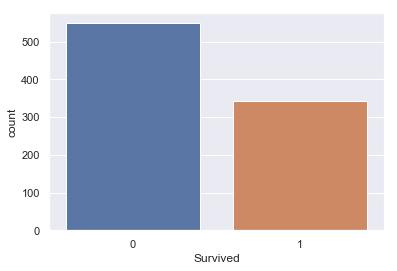

In [7]:
sns.countplot(x='Survived', data=df_train)

In [8]:
print(df_train.Survived.sum()/df_train.Survived.count())

0.3838383838383838


**Sex:Female more likely to survive than male**

In [9]:
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

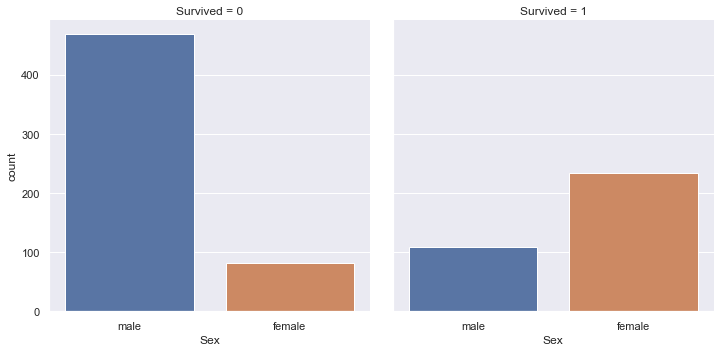

In [10]:
sns.catplot(x='Sex', col='Survived', kind ='count', data=df_train)

In [11]:
print("% of women survived: ", df_train[df_train.Sex=='female'].Survived.sum()/
         df_train[df_train.Sex=='female'].Survived.count())

print("% of women survived: ", df_train[df_train.Sex=='male'].Survived.sum()/df_train[df_train.Sex=='male'].Survived.count())



% of women survived:  0.7420382165605095
% of women survived:  0.18890814558058924


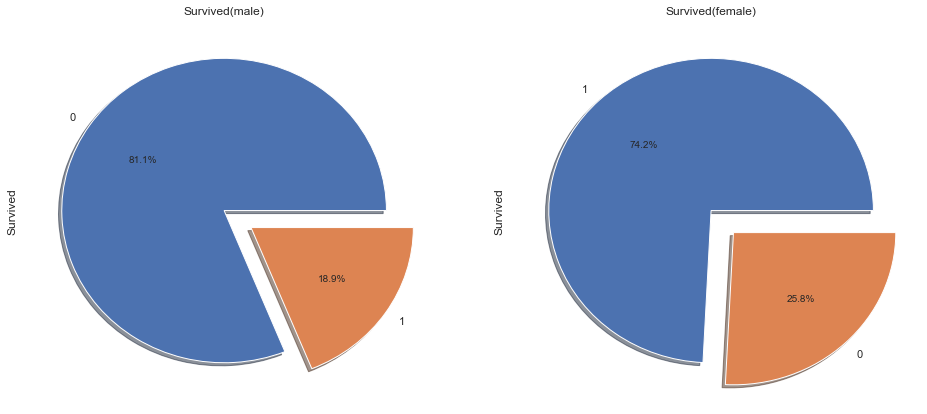

In [12]:
f, ax =plt.subplots(1,2,figsize=(16,7))
df_train['Survived'][df_train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)

df_train['Survived'][df_train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)

ax[0].set_title('Survived(male)')
ax[1].set_title('Survived(female)')
plt.show()

**Passenger Class: Survival rate decreases with Pclass**

In [13]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [14]:
print('% of survivals in')
print('Pclass=1: ', df_train.Survived[df_train.Pclass==1].sum()/df_train[df_train.Pclass==1].Survived.count())

print('Pclass=2', df_train.Survived[df_train.Pclass==2].sum()/df_train[df_train.Pclass==2].Survived.count())

print('Pclass=3', df_train.Survived[df_train.Pclass==3].sum()/df_train[df_train.Pclass==3].Survived.count())


% of survivals in
Pclass=1:  0.6296296296296297
Pclass=2 0.47282608695652173
Pclass=3 0.24236252545824846


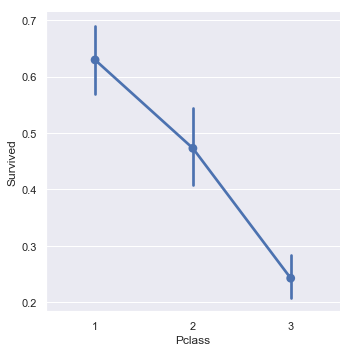

In [15]:
sns.catplot('Pclass','Survived', kind='point', data=df_train)

**Passenger Class and Sex:**<br>
**Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died**

In [16]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

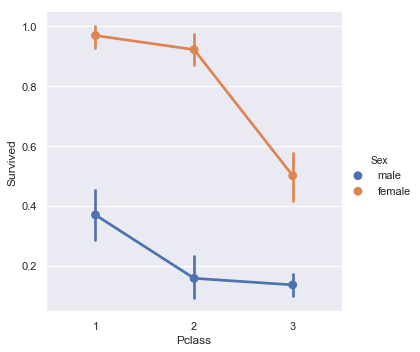

In [17]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data = df_train)

**Embarked:Survival rate lowest for S and highest for C**

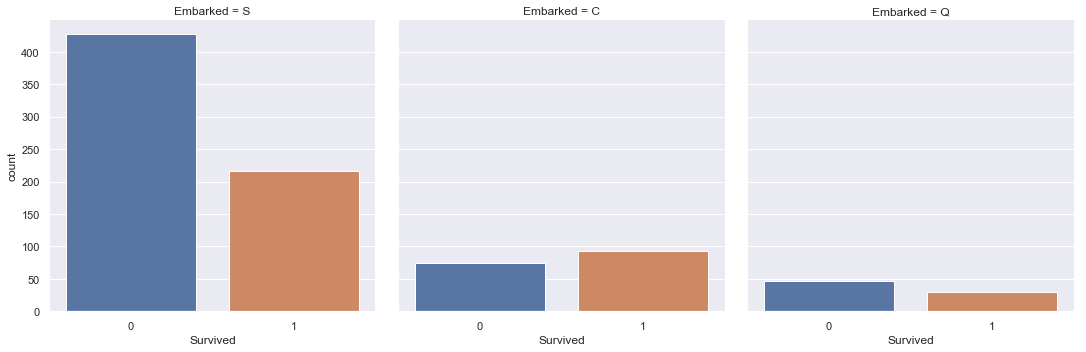

In [18]:
sns.catplot(x='Survived', col ='Embarked', kind='count', data=df_train)

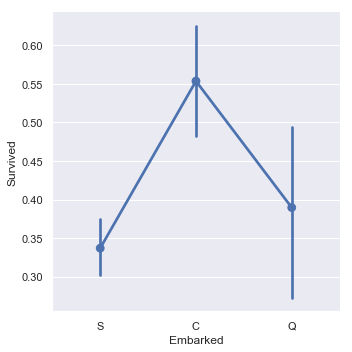

In [19]:
sns.catplot('Embarked','Survived',kind='point', data=df_train)

**Embarked and Sex**

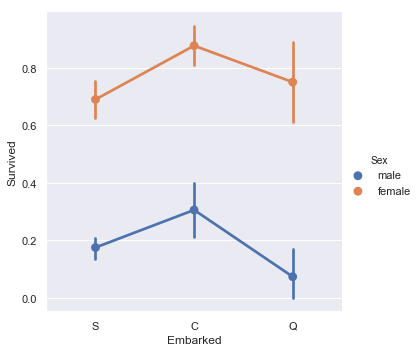

In [20]:
sns.catplot('Embarked','Survived', hue='Sex', kind='point', data=df_train)

**Embarked, Pclass and Sex:**<br>

**Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.<br>
All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass2 and 3 is always below 0.2<br>
For the remaining men in Pclass 1 that embarked in S an Q, survival rate is approx 0.4**

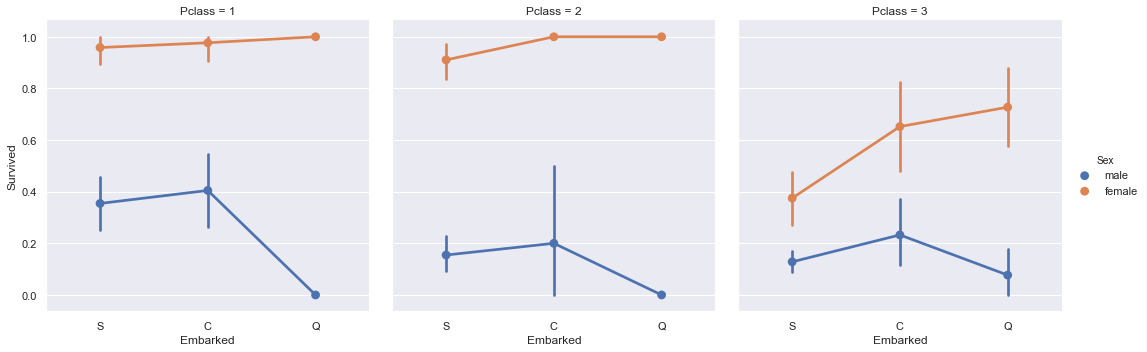

In [21]:
sns.catplot('Embarked','Survived', col='Pclass', hue='Sex', kind='point', data=df_train)

In [22]:
pd.crosstab([df_train.Survived],[df_train.Sex, df_train.Pclass,df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

**Third Model: based on PClass, Sex and Embarked, submission: 0.779accuracy**

In [23]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [24]:
# #model 3

# df_test['Survived'] = 0
# # all women survived
# df_test.loc[(df_test.Sex=='female'), 'Survived']=1
# #except for those in Pclass 3 and embarked in S
# df_test.loc[(df_test.Sex=='female')&(df_test.Pclass==3)&(df_test.Embarked=='S'),'Survived']=0


**Age: continuous numerical to 8 bins**

In [25]:
len(df_train)

891

In [26]:
df_train['Age'].count()

714

In [27]:
for df in [df_train, df_test]:
    df['Age_bin'] = np.nan
    for i in range(8,0,-1):
        df.loc[df['Age']<=i*10, 'Age_bin']=i

In [28]:
print(df_train[['Age','Age_bin']].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


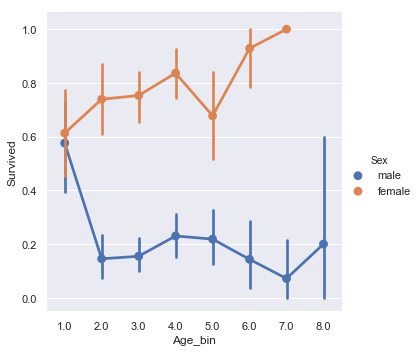

In [29]:
sns.catplot('Age_bin','Survived',hue='Sex', kind='point', data=df_train)

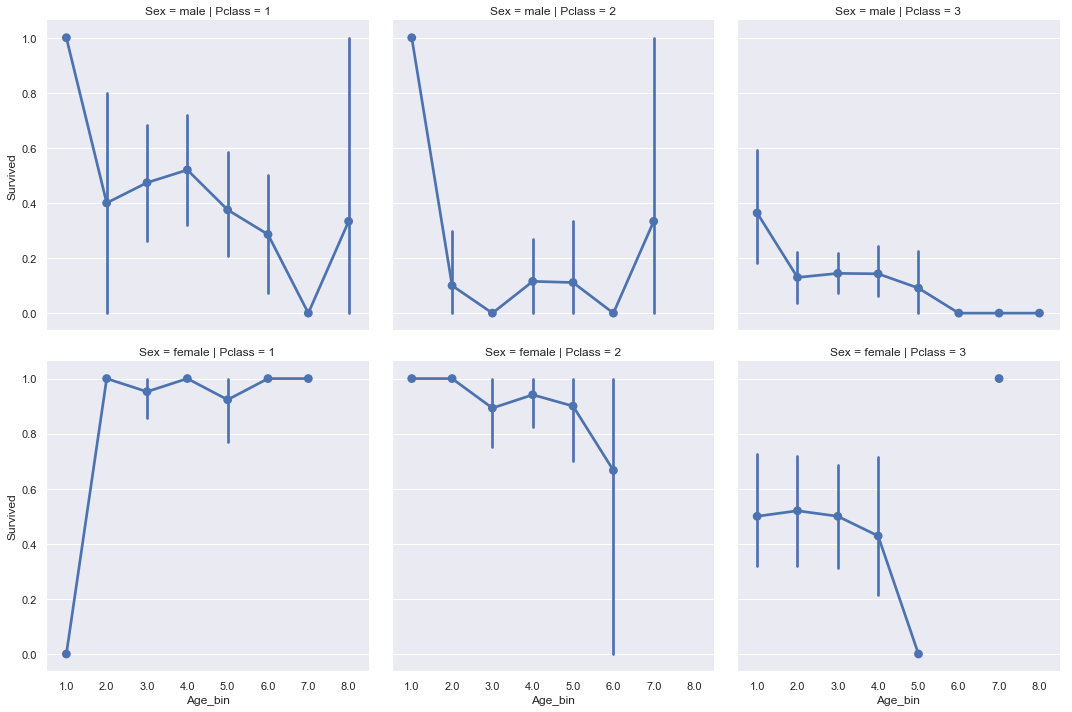

In [30]:
sns.catplot('Age_bin','Survived',col='Pclass', row='Sex', kind='point', data=df_train)

In [31]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For passengers in Age_Bin =1 (younger than 10): all male in Pclass 1 and 2 survived<br>
All female in Pclass 3 and Age_bin = 5 died.<br>
(Survival rate for female in Pclass 3 and Age_bin = 4 is below 50%)<br>
(Survival rate for male in Pclass 1 and Age_bin = 4 is above 50%)

In [32]:
# # in Pclass 1 and 2 all men in Age_bin = 1 survived
# df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
# df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

**SibSp and Parch**

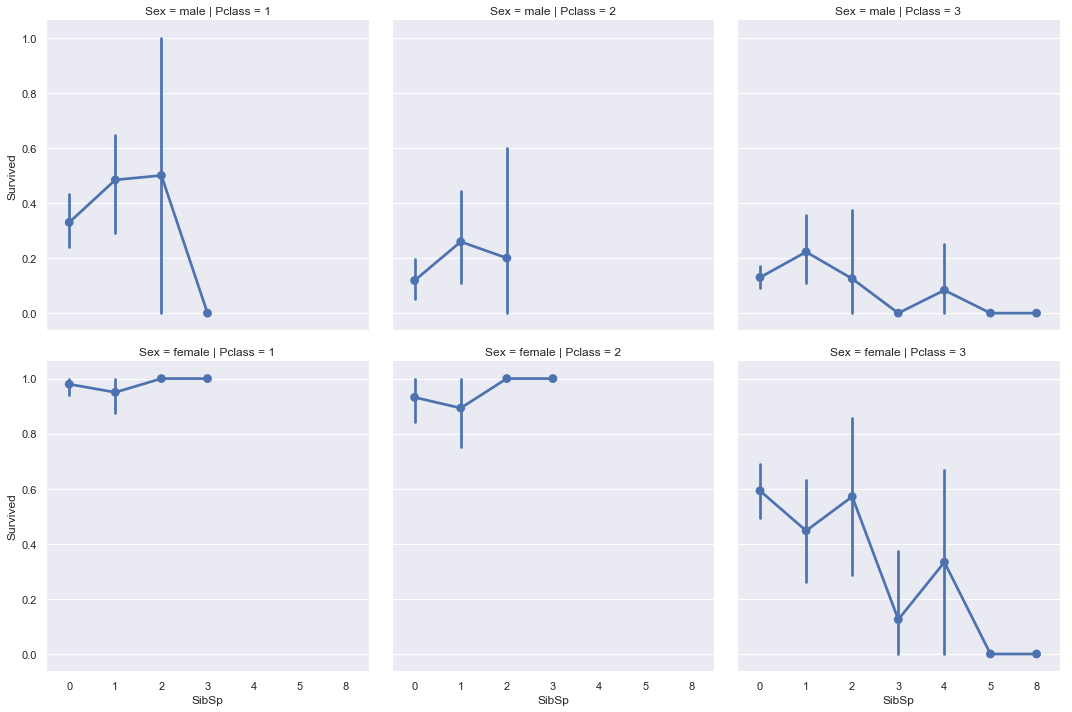

In [33]:
sns.catplot('SibSp', 'Survived', col='Pclass', row='Sex', kind='point', data=df_train)

In [34]:
pd.crosstab([df_train.Sex, df_train.Survived],[df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

For males, no survival rate above 0.5 for any values of SibSp. For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died. For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5

In [35]:
# #all females with sibsp > 7 died
# df_test.loc[(df_test.Sex=='female')& (df_test.SibSp > 7), 'Survived'] = 0

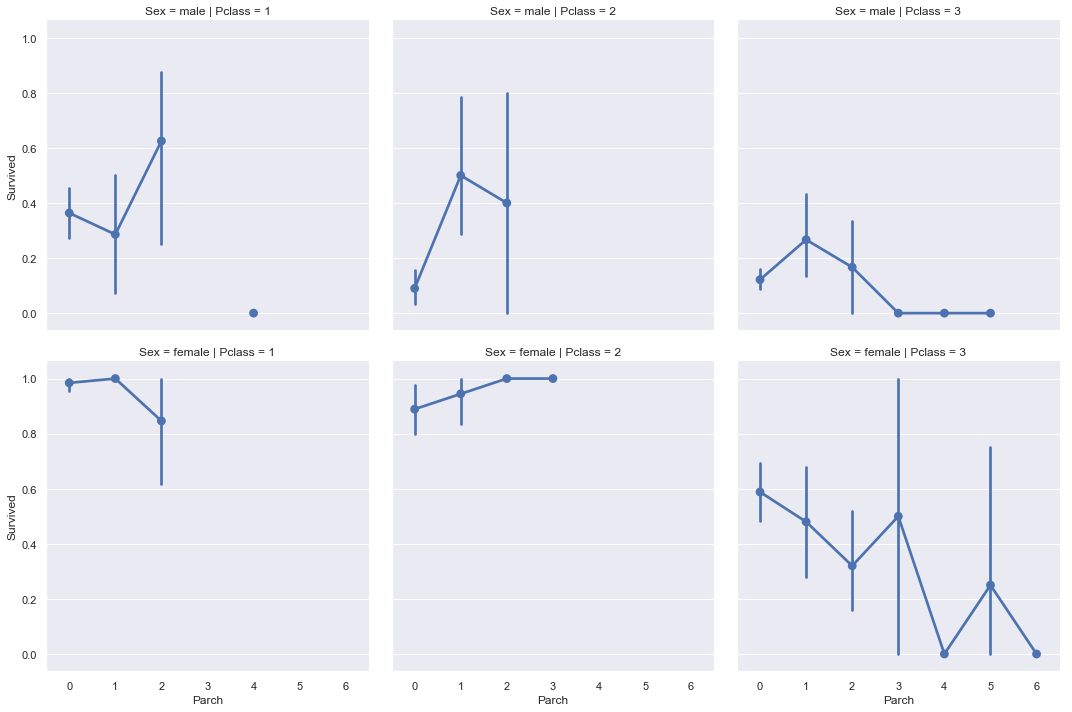

In [36]:
sns.catplot('Parch','Survived',col='Pclass', row = 'Sex', kind='point', data = df_train)

In [37]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [38]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
##df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
##df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

#df_test.head(20)


**Fare:continuous numerical to 12 bins**

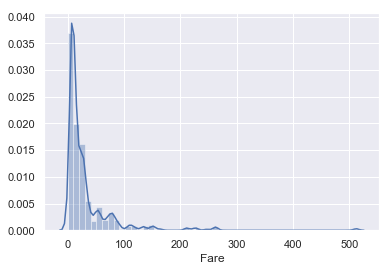

In [39]:
sns.distplot(df_train['Fare'])

In [40]:
for df in [df_train, df_test]:
    df['Fare_bin'] = np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare']<=i*50, 'Fare_bin']= i

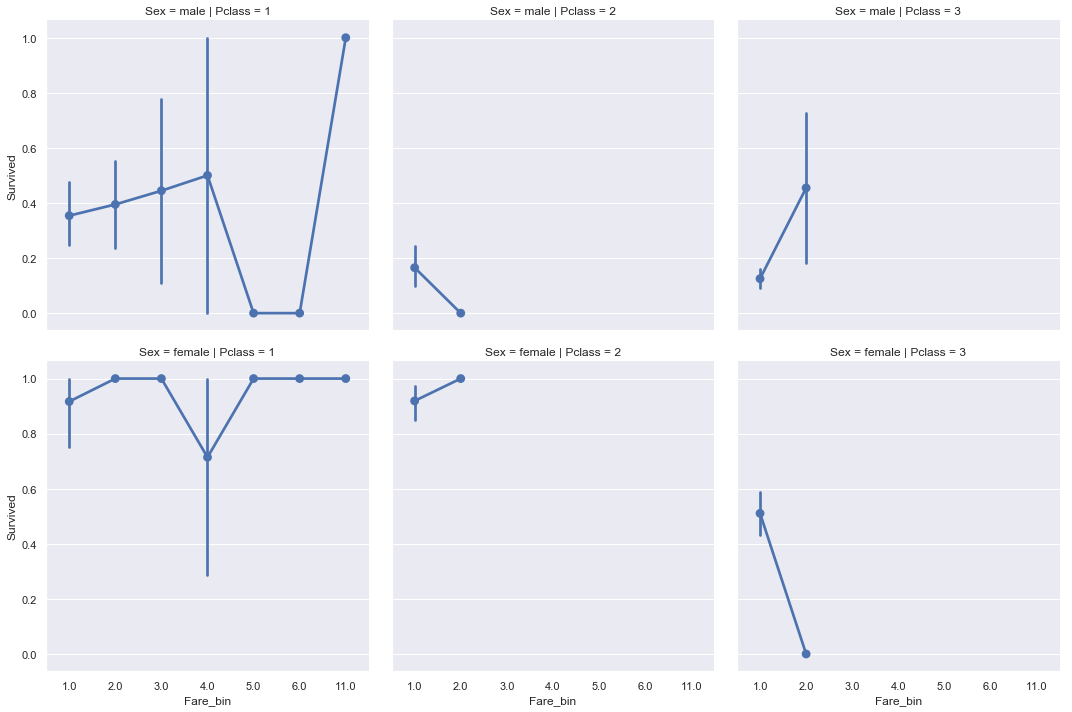

In [41]:
sns.catplot('Fare_bin','Survived', col='Pclass', row='Sex', kind ='point', data=df_train)

In [42]:
pd.crosstab([df_train.Sex, df_train.Survived],[df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [43]:
# # males in Fare_bin = 11 survived
# df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

fourth model: model 3+ Age_bin, SibSp, Parch and Fare_bin<br>
submission: 0.789 accuracy

In [46]:
# model 4
# df_test[['PassengerId', 'Survived']].to_csv('model_4.csv', index=False)

## Part2: Data wrangling

building two new dataframes df_train_ml and df_test_ml<br>
these will have only ordinal features and no missing values so they can be used for ML algorithms<br>
converting categorical to numerical by pd.get_dummies<br>
droping all features that seen to be not useful for prediction<br>
Then use the Standard scaler and apply train/test split

In [50]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

**pandas get_dummies for categorical features**

In [51]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked','Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket','Cabin','Age_bin','Fare_bin'], axis=1, inplace=True)
df_train_ml.dropna(inplace=True)

In [53]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex','Embarked','Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket','Cabin','Age_bin','Fare_bin'], axis=1, inplace=True)

In [55]:
df_train_ml.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [56]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
Survived      714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 37.0 KB


In [57]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Sex_male      418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
Pclass_2      418 non-null uint8
Pclass_3      418 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


**Correlation Matrix**

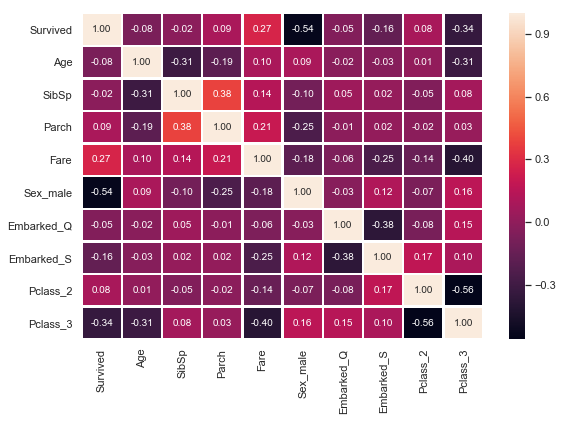

In [59]:
corr = df_train_ml.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

Survived and Fare positively correlated, Survived and Sex_male negatively correlated.<br>
Also, Survived and Pclass_3 negatively correlated. SibSp and Parch correlated

**Sklearn StandardScaler**

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

#for df_train_ml
scaler.fit(df_train_ml.drop('Survived', axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived', axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

#for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)

#scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)